<h1 align="center"> Explaining Box Plots </h1>

I was always curious about where the -2.698σ,  -.6745σ, 6745σ, and 2.698σ numbers came from. Consequently I would look it up and find they are from Z Score Tables which are basically tables showing the percentages of numbers coming up in a normal. This post will derive a Z Score table and explain the different parts of a box plot.

This notebook explains how those numbers were derived in the hope that they can be more interpretable for your future endeavors.

In [92]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import ConnectionPatch
from scipy.integrate import quad
%matplotlib inline

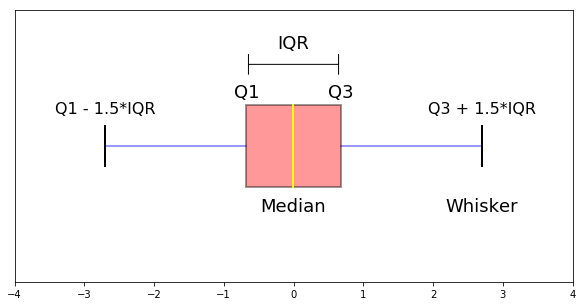

In [96]:
# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))

# rectangular box plot
bplot = axes.boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=False, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                widths = .3,
                zorder = 1)   

axes.set_xlim(-4, 4)
axes.set_yticks([])
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

axes.annotate(r'',
            xy=(-.6745, .30), xycoords='data',
            xytext=(.6745, .30), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes.text(0, .36, r"IQR",  horizontalalignment='center', fontsize=18)
axes.text(0, -.24, r"Median", horizontalalignment='center', fontsize=18);
axes.text(2.698, -.24, r"Whisker", horizontalalignment='center', fontsize=18);
axes.text(-.6745, .18, r"Q1", horizontalalignment='center', fontsize=18);
axes.text(-2.698, .12, r"Q1 - 1.5*IQR", horizontalalignment='center', fontsize=16);
axes.text(.6745, .18, r"Q3", horizontalalignment='center', fontsize=18);
axes.text(2.698, .12, r"Q3 + 1.5*IQR", horizontalalignment='center', fontsize=16);

## Putting it All Together

In [47]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

#Integrate PDF from -.6745 to .6745
result_n67_67, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)

# Integrate PDF from -2.698 to -.6745
result_n2698_67, _ = quad(normalProbabilityDensity, -2.698, -.6745, limit = 1000)

# Integrate PDF from .6745 to 2.698
result_67_2698, _ = quad(normalProbabilityDensity, .6745, 2.698, limit = 1000)

# Integrate PDF from 2.698 to positive infinity
result_2698_inf, _ = quad(normalProbabilityDensity, 2.698, np.inf, limit = 1000)

# Integrate PDF from negative infinity to -2.698
result_ninf_n2698, _ = quad(normalProbabilityDensity, np.NINF, -2.698, limit = 1000)

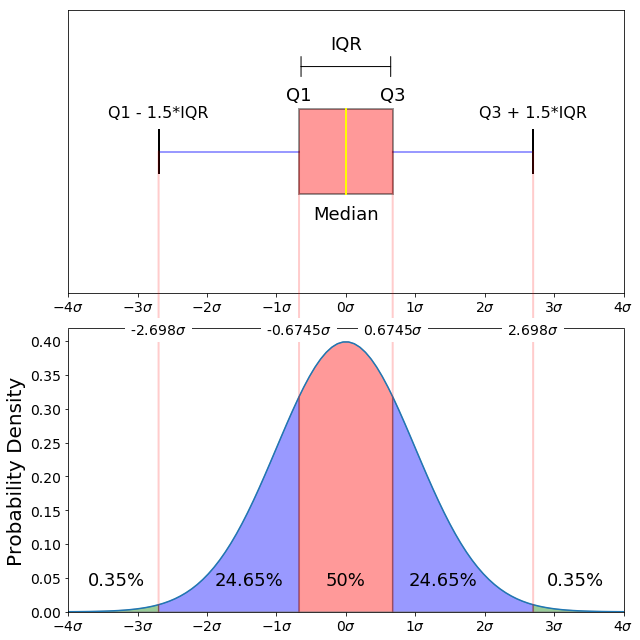

In [91]:
# connection path is here: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(9, 9))

# rectangular box plot
bplot = axes[0].boxplot(s,
                vert=False,
                patch_artist=True, 
                showfliers=False, # This would show outliers (the remaining .7% of the data)
                positions = [0],
                boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'red', alpha = .4),
                medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
                whiskerprops = dict(linestyle='-', linewidth=2, color='Blue', alpha = .4),
                capprops = dict(linestyle='-', linewidth=2, color='Black'),
                widths = .3,
                zorder = 1)   

axes[0].set_xlim(-4, 4)
axes[0].set_yticks([])
x = np.linspace(-4, 4, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

axes[0].annotate(r'',
            xy=(-.6745, .30), xycoords='data',
            xytext=(.6745, .30), textcoords='data',
            arrowprops=dict(arrowstyle="|-|",
                            connectionstyle="arc3")
            );

axes[0].text(0, .36, r"IQR",  horizontalalignment='center', fontsize=18)
axes[0].text(0, -.24, r"Median", horizontalalignment='center', fontsize=18);
axes[0].text(-.6745, .18, r"Q1", horizontalalignment='center', fontsize=18);
axes[0].text(-2.698, .12, r"Q1 - 1.5*IQR", horizontalalignment='center', fontsize=16);
axes[0].text(.6745, .18, r"Q3", horizontalalignment='center', fontsize=18);
axes[0].text(2.698, .12, r"Q3 + 1.5*IQR", horizontalalignment='center', fontsize=16);

axes[1].plot(x, pdf_normal_distribution, zorder= 2)
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(0)
axes[1].set_ylabel('Probability Density', size = 20)

##############################
# lower box
con = ConnectionPatch(xyA=(-.6745, 0), xyB=(-.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="red", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper box
con = ConnectionPatch(xyA=(.6745, 0), xyB=(.6745, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="red", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# lower whisker
con = ConnectionPatch(xyA=(-2.698, 0), xyB=(-2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="red", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# upper whisker
con = ConnectionPatch(xyA=(2.698, 0), xyB=(2.698, 0),
    coordsA="data", coordsB="data", axesA=axes[1], axesB=axes[0],
    arrowstyle="-", linewidth=2, color="red", zorder = 2, alpha = .2)
axes[1].add_artist(con)

# Make the shaded center region to represent integral
a, b = -.6745, .6745
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(-.6745, 0)] + list(zip(ix, iy)) + [(.6745, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly)
axes[1].text(0, .04, r'{0:.0f}%'.format(result_n67_67*100),
         horizontalalignment='center', fontsize=18)

##############################
a, b = -2.698, -.6745# integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(-1.40, .04, r'{0:.2f}%'.format(result_n2698_67*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = .6745, 2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='blue', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(1.40, .04, r'{0:.2f}%'.format(result_67_2698*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = 2.698, 4 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(3.3, .04, r'{0:.2f}%'.format(result_2698_inf*100),
         horizontalalignment='center', fontsize=18);

##############################
a, b = -4, -2.698 # integral limits

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='green', edgecolor='0.2', alpha = .4)
axes[1].add_patch(poly);
axes[1].text(-3.3, .04, r'{0:.2f}%'.format(result_ninf_n2698*100),
         horizontalalignment='center', fontsize=18);

##############################
xTickLabels = [r'$-4\sigma$',
               r'$-3\sigma$',
               r'$-2\sigma$',
               r'$-1\sigma$',
               r'$0\sigma$',
               r'$1\sigma$',
               r'$2\sigma$',
               r'$3\sigma$',
               r'$4\sigma$']

yTickLabels = ['0.00',
               '0.05',
               '0.10',
               '0.15',
               '0.20',
               '0.25',
               '0.30',
               '0.35',
               '0.40']

# Make both x axis into standard deviations
axes[0].set_xticklabels(xTickLabels, fontsize = 14)
axes[1].set_xticklabels(xTickLabels, fontsize = 14)

# Only the PDF needs y ticks
axes[1].set_yticklabels(yTickLabels, fontsize = 14)

##############################
# Add -2.698, -.6745, .6745, 2.698 text without background
axes[1].text(-.6745,.41, r'{0:.4f}'.format(-.6745) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(.6745, .410, r'{0:.4f}'.format(.6745) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(-2.698, .410, r'{0:.3f}'.format(-2.698) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

axes[1].text(2.698, .410, r'{0:.3f}'.format(2.698) + '$\sigma$', horizontalalignment='center', fontsize=14,
            bbox={'facecolor':'white', 'edgecolor':'none', 'pad':5});

fig.tight_layout()
fig.savefig('images/boxplotNormalDistribution.png', dpi = 900)

![](images/68_95_99_rule.png)

The normal distribution is commonly associated with the normal distribution with the 68-95-99.7 rule which you can see in the image above. 68% of the data is within 1 standard deviation (σ) of the mean (μ), 95% of the data is within 2 standard deviations (σ) of the mean (μ), and 99.7% of the data is within 3 standard deviations (σ) of the mean (μ).

This notebook explains how those numbers were derived in the hope that they can be more interpretable for your future endeavors.

## Probability Density Function

To be able to understand where the percentages come from in the 68-95-99.7 rule, it is important to know about the probability density function (PDF). A PDF is used to specify the probability of the random variable falling within a particular range of values, as opposed to taking on any one value. This probability is given by the integral of this variable’s PDF over that range — that is, it is given by the area under the density function but above the horizontal axis and between the lowest and greatest values of the range. This definition might not make much sense so let’s clear it up by graphing the probability density function for a normal distribution. The equation below is the probability density function for a normal distribution

![](images/probabilityDensityFunctionNormalDistribution.png)

Let’s simplify it by assuming we have a mean (μ) of 0 and a standard deviation (σ) of 1.

![](images/pdfNormal_mean0_std_1.png)

Now that the function is simpler, let’s graph this function with a range from -3 to 3.

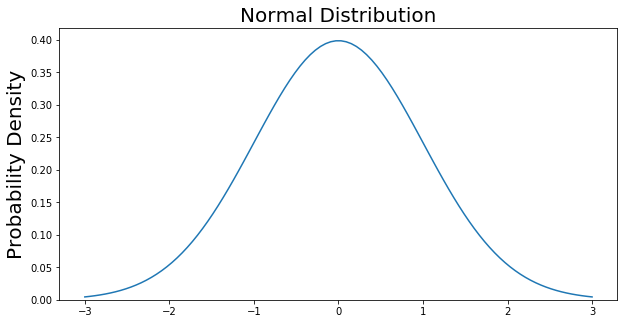

In [61]:
# Import all libraries for the rest of the blog post
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

The graph above does not show you the probability of events but their probability density. To get the probability of an event within a given range we will need to integrate. Suppose we are interested in finding the probability of a random data point landing within 1 standard deviation of the mean, we need to integrate from -1 to 1. This can be done with SciPy.

## Within 1 Standard Deviation

<b>Math Expression</b> $$\int_{-1}^{1}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [83]:
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -1 to 1
result_n1_1, _ = quad(normalProbabilityDensity, -1, 1, limit = 1000)
print(result_n1_1)

0.682689492137086


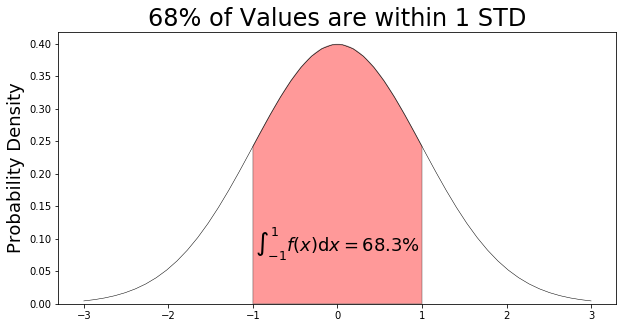

In [84]:
a, b = -1, 1 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-1}^{1} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n1_1*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'68% of Values are within 1 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/68_1_std.png', dpi = 1200)

68% of the data is within 1 standard deviation (σ) of the mean (μ).

## Within 2 Standard Deviations

<b>Math Expression</b> $$\int_{-2}^{2}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [85]:
# Make the PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2 to 2
result_n2_2, _ = quad(normalProbabilityDensity, -2, 2, limit = 1000)
print(result_n2_2)

0.9544997361036417


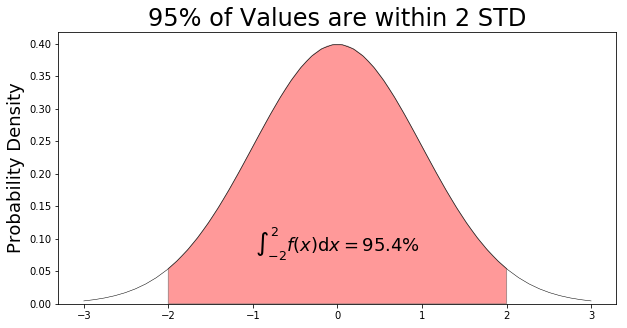

In [86]:
a, b = -2, 2 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-2}^{2} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n2_2*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'95% of Values are within 2 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/95_2_std.png', dpi = 1200)

95% of the data is within 2 standard deviations (σ) of the mean (μ).

## Within 3 Standard Deviations

<b>Math Expression</b> $$\int_{-3}^{3}\frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}\mathrm{d}x$$

In [87]:
# Make the PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -3 to 3
result_n3_3, _ = quad(normalProbabilityDensity, -3, 3, limit = 1000)
print(result_n3_3)

0.9973002039367399


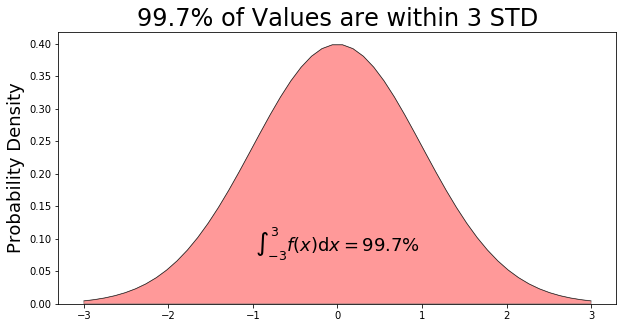

In [88]:
a, b = -3, 3 # integral limits

x = np.linspace(-3, 3)
y = normalProbabilityDensity(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, 'k', linewidth=.5)
ax.set_ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = normalProbabilityDensity(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='red', edgecolor='0.2', alpha = .4)
ax.add_patch(poly);

ax.text(0, .08, r"$\int_{-3}^{3} f(x)\mathrm{d}x = $" + "{0:.1f}%".format(result_n3_3*100),
         horizontalalignment='center', fontsize=18);

ax.set_title(r'99.7% of Values are within 3 STD', fontsize = 24);
ax.set_ylabel(r'Probability Density', fontsize = 18);

fig.savefig('images/99_3_std.png', dpi = 1200)

99.7% of the data is within 3 standard deviations (σ) of the mean (μ).

## Negative Infinity to Positive Infinity

For any PDF, the area under the curve must be 1 (the probability of drawing any number from the function's range is always 1).

<b>You will also find that it is also possible for observations to fall 4, 5 or even more standard deviations from the mean, but this is very rare if you have a normal or nearly normal distribution.</b>

## Boxplot Documentation Used

General boxplot documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

Changing Color of Boxplot: https://matplotlib.org/examples/statistics/boxplot_color_demo.html

Properties of a box plot: https://matplotlib.org/examples/statistics/boxplot_demo.html

How I plotted over multiple subplots: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs

Back No Border but have background for ax text: https://stackoverflow.com/questions/27531290/remove-matplotlib-text-plot-border